In [4]:
import numpy as np
import glob
import pandas as pd
import os
import datetime
import matplotlib
import matplotlib.pyplot as plt

# Helium I

In [381]:
files_He = glob.glob('Data/Spectra/Helium*.txt')


In [492]:
f = files_He[0]
spectra = pd.read_table(f,names=['channel','intensity'],skiprows=13,sep='\t')
channel = spectra.channel.values
intensity = spectra.intensity.values

In [493]:
%matplotlib widget

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
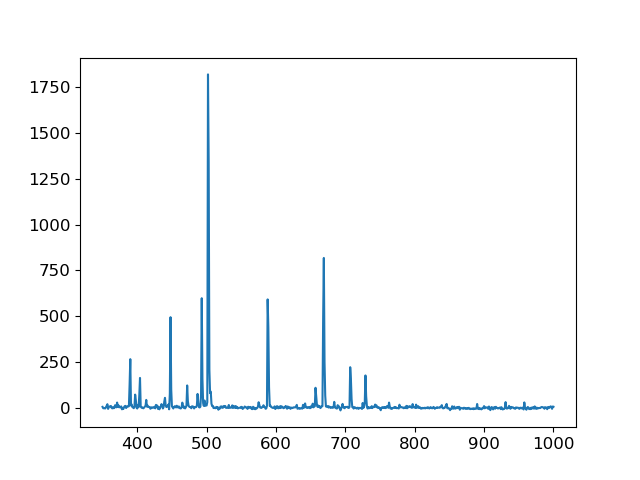

In [494]:
plt.figure()
plt.plot(channel, intensity,'-')

In [495]:
f

'Data/Spectra\\Helium1000V173mT_500ms_USB2G486391__13__00068.txt'

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
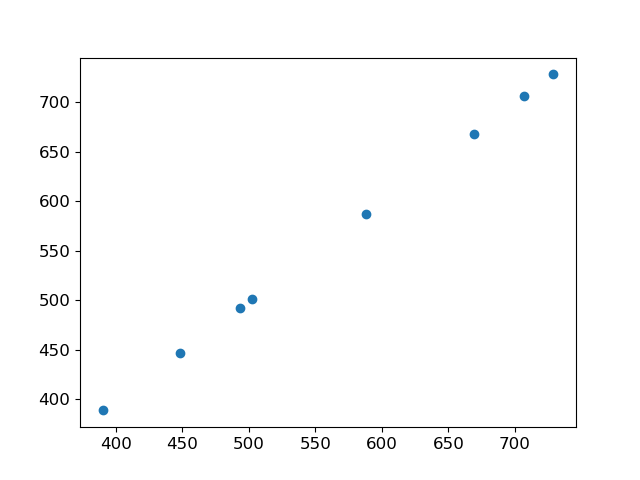

In [496]:
true_lines_He=[388.86,447.15,492.2,501.6,587.6,667.96,706.52,728.13]
observed_lines_He=[390,448.0,493.0,502.0,588,669,707,729]

plt.figure()
plt.plot(observed_lines_He,true_lines_He,'o')
m_cal,b_cal = np.polyfit(observed_lines_He,true_lines_He,1)

In [497]:
matplotlib.rcParams['font.size'] = 12

Text(0.5, 1.0, 'Helium Calibration Spectrum')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
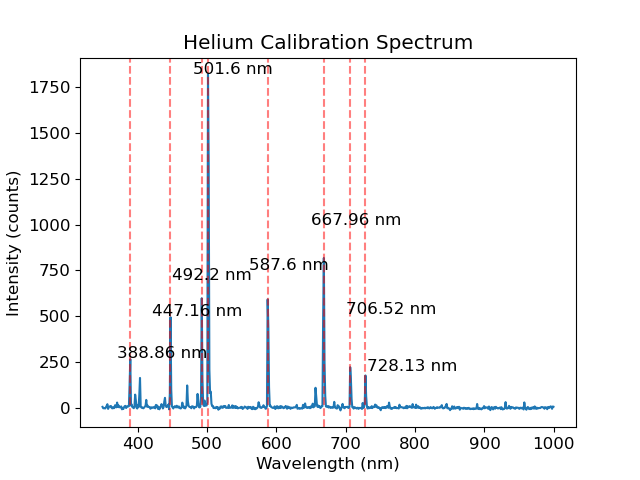

In [498]:
plt.figure()
plt.plot(channel*m_cal+b_cal, intensity,'-')

plt.annotate('501.6 nm',(480,1820))
plt.annotate('492.2 nm',(450,700))
plt.annotate('447.16 nm',(420,500))
plt.annotate('587.6 nm',(560,750))
plt.annotate('667.96 nm',(650,1000))
plt.annotate('388.86 nm',(370,270))
plt.annotate('706.52 nm',(700,510))
plt.annotate('728.13 nm',(730,200))


for l in true_lines_He:
    plt.axvline(l,c='r',linestyle='dashed',alpha=0.5)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (counts)')
plt.title('Helium Calibration Spectrum')

In [395]:
# 388.86, 402.62, 412.08, 447.15, 471.31, 
# 492.19, 501.57, 504.77, 587.56, 667.82, 
# 706.52, 728.13 

He_line_info = {388.86:{'Aki': 9.4746e+06, 'Ei':19.8196,'Ek':23.00707,'gi':1 ,'gk':1,'Iik':{'173':[],'245':[],'465':[],'617':[],'905':[]}, 'observed':389 },
             447.15:{'Aki': (6.8275e+05+6.1440e+06+2.4579e+07+1.0241e+07+1.8432e+07)/5*200/225+1.3655e+07*25/225,
                     'Ei':20.9641 ,'Ek':23.73609,
                     'gi': 0+1+1+2+2+2,
                     'gk': 1+2+1+3+2+1,
                     'Iik':{'173':[],'245':[],'465':[],'617':[],'905':[]}, 
                     'observed':448.0 }, # has different options
             492.2:{'Aki': 1.9863e+07, 'Ei':21.2180 ,'Ek':23.7363 ,'gi':1 ,'gk':2 ,'Iik':{'173':[],'245':[],'465':[],'617':[],'905':[]}, 'observed':493.0 },
             501.6:{'Aki': 1.3372e+07, 'Ei':20.6157 ,'Ek':23.0870 ,'gi':0 ,'gk':1 ,'Iik':{'173':[],'245':[],'465':[],'617':[],'905':[]}, 'observed':502.0 },
             587.6:{'Aki': (1.7673e+07+7.0708e+07+2.9462e+07+5.3019e+07)/4*500/600+ 3.9282e+07*100/600, 
                    'Ei':20.96421 ,'Ek':23.07365,
                    'gi':0+1+1+2+2,
                    'gk':1+2+1+3+2 ,
                    'Iik':{'173':[],'245':[],'465':[],'617':[],'905':[]},
                    'observed':588 }, # different options
             667.96:{'Aki': 6.3705e+07, 'Ei':20.96421 ,'Ek':23.0740 ,'gi':0 ,'gk':1 ,'Iik':{'173':[],'245':[],'465':[],'617':[],'905':[]}, 'observed':669 },
             706.52:{'Aki': (1.5474e+07+3.0948e+06)/2, 'Ei':20.9641,'Ek':22.71846 ,
                     'gi': 1+2,
                     'gk':1+1,
                     'Iik':{'173':[],'245':[],'465':[],'617':[],'905':[]}, 'observed':706 },
             728.13:{'Aki': 1.8299e+07, 'Ei':21.2180 ,'Ek':22.9203 ,'gi':1 ,'gk':0 ,'Iik':{'173':[],'245':[],'465':[],'617':[],'905':[]}, 'observed':728 }}


# He_line_info = {388.86:{'Aki': 9.4746e+06, 'Ei':19.8196,'Ek':23.00707,'gi':1 ,'gk':1,'Iik':{'173':[],'245':[],'465':[],'617':[],'905':[]}, 'observed':389 },
#              447.15:{'Aki': 2.4579e+07,
#                      'Ei':20.9641 ,'Ek':23.73609,'gi': 2,'gk':3 ,
#                      'Iik':{'173':[],'245':[],'465':[],'617':[],'905':[]}, 
#                      'observed':448.0 }, # has different options
#              492.2:{'Aki': 1.9863e+07, 'Ei':21.2180 ,'Ek':23.7363 ,'gi':1 ,'gk':2 ,'Iik':{'173':[],'245':[],'465':[],'617':[],'905':[]}, 'observed':493.0 },
#              501.6:{'Aki': 1.3372e+07, 'Ei':20.6157 ,'Ek':23.0870 ,'gi':0 ,'gk':1 ,'Iik':{'173':[],'245':[],'465':[],'617':[],'905':[]}, 'observed':502.0 },
#              587.6:{'Aki': 7.0708e+07, 
#                     'Ei':20.96421 ,'Ek':23.07365,'gi':2 ,'gk':3 ,
#                     'Iik':{'173':[],'245':[],'465':[],'617':[],'905':[]},
#                     'observed':588 }, # different options
#              667.96:{'Aki': 6.3705e+07, 'Ei':20.96421 ,'Ek':23.0740 ,'gi':0 ,'gk':1 ,'Iik':{'173':[],'245':[],'465':[],'617':[],'905':[]}, 'observed':669 },
#              706.52:{'Aki': 1.5474e+07, 'Ei':20.9641,'Ek':22.71846 ,'gi': 0,'gk':1 ,'Iik':{'173':[],'245':[],'465':[],'617':[],'905':[]}, 'observed':706 },
#              728.13:{'Aki': 1.8299e+07, 'Ei':21.2180 ,'Ek':22.9203 ,'gi':1 ,'gk':0 ,'Iik':{'173':[],'245':[],'465':[],'617':[],'905':[]}, 'observed':728 }}



In [396]:
(6.8275e+05+6.1440e+06+2.4579e+07+1.0241e+07+1.8432e+07)/5*200/225+1.3655e+07*25/225

12197888.888888888

In [470]:
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['legend.fontsize'] = 12

AxesSubplot(0.125,0.798085;0.775x0.0819149)
AxesSubplot(0.125,0.699787;0.775x0.0819149)
AxesSubplot(0.125,0.601489;0.775x0.0819149)
AxesSubplot(0.125,0.503191;0.775x0.0819149)
AxesSubplot(0.125,0.404894;0.775x0.0819149)
AxesSubplot(0.125,0.306596;0.775x0.0819149)
AxesSubplot(0.125,0.208298;0.775x0.0819149)
AxesSubplot(0.125,0.11;0.775x0.0819149)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
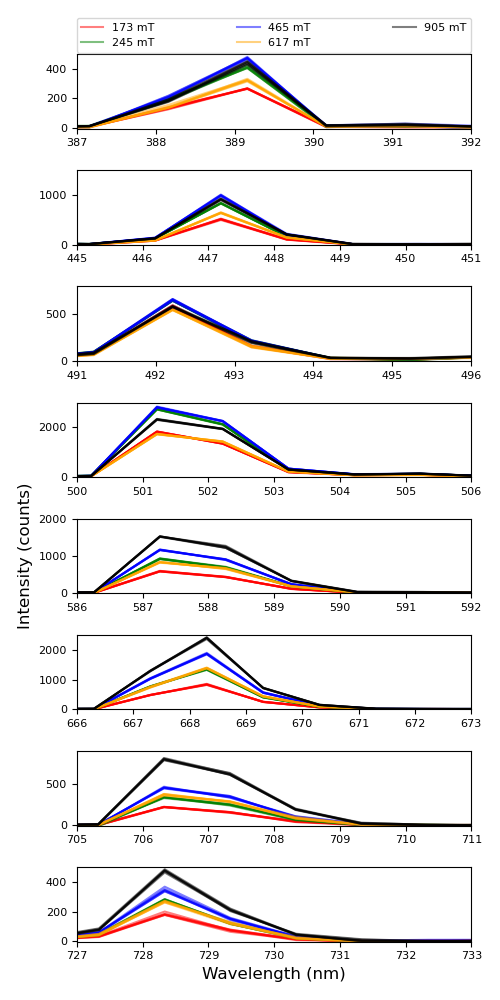

In [398]:
colors={'173':'r','245':'g','465':'b','617':'orange','905':'k'}

fig, axes = plt.subplots(8, figsize=(5,10))

for ax in axes.flatten():
    print(ax)
    plotted={'173':False,'245':False,'465':False,'617':False,'905':False}
    for f in files_He:
        spectra = pd.read_table(f,names=['channel','intensity'],skiprows=13,sep='\t')
        channel = spectra.channel.values * m_cal + b_cal
        intensity = spectra.intensity.values
        p = f.split('mT')[0].split('V')[1]
#         print(p)
        for line in He_line_info.keys():
            I = np.sum(intensity[np.where((channel < (line + 2)) & (channel > (line - 2)))])
#             print(line, I)
            He_line_info[line]['Iik'][p].append(I)
        if plotted[p]:
            ax.plot(channel, intensity,'-',c=colors[p],alpha=0.5)
        else:
            ax.plot(channel, intensity,'-',c=colors[p],alpha=0.5,label=p+' mT')
            plotted[p] = True

axes[7].set_xlabel('Wavelength (nm)')
axes[4].set_ylabel('Intensity (counts)')

axes[0].set_xlim(387,392)
axes[0].set_ylim(-3,500)

axes[1].set_xlim(445,451)
axes[1].set_ylim(-3,1500)

axes[2].set_xlim(491,496)
axes[2].set_ylim(-3,800)

axes[3].set_xlim(500,506)
axes[3].set_ylim(-3,3000)

axes[4].set_xlim(586,592)
axes[4].set_ylim(-3,2000)

axes[5].set_xlim(666,673)
axes[5].set_ylim(-3,2500)

axes[6].set_xlim(705,711)
axes[6].set_ylim(-3,900)

axes[7].set_xlim(727,733)
axes[7].set_ylim(-3,500)


# axes[3,1].set_xlabel('Wavelength (nm)')
# axes[3,0].set_xlabel('Wavelength (nm)')
# axes[1,0].set_ylabel('Intensity (counts)')
# #     ax.legend()

# axes[0,0].set_xlim(387,392)
# axes[0,0].set_ylim(-3,500)

# axes[0,1].set_xlim(445,451)
# axes[0,1].set_ylim(-3,1500)

# axes[1,0].set_xlim(491,496)
# axes[1,0].set_ylim(-3,800)

# axes[1,1].set_xlim(500,506)
# axes[1,1].set_ylim(-3,3000)

# axes[2,0].set_xlim(586,592)
# axes[2,0].set_ylim(-3,2000)

# axes[2,1].set_xlim(666,673)
# axes[2,1].set_ylim(-3,2500)

# axes[3,0].set_xlim(705,711)
# axes[3,0].set_ylim(-3,900)

# axes[3,1].set_xlim(727,733)
# axes[3,1].set_ylim(-3,500)
axes[0].legend(bbox_to_anchor=(0,1.02,1,0.2), mode="expand", borderaxespad=0,loc='lower left', ncol=3)
fig.tight_layout()


In [399]:
He_df = pd.DataFrame.from_dict(He_line_info)

In [400]:
He_df

,388.86,447.15,492.20,501.60,587.60,667.96,706.52,728.13
Aki,9474600.0,12197888.888889,19863000.0,13372000.0,42143250.0,63705000.0,9284400.0,18299000.0
Ei,19.8196,20.9641,21.218,20.6157,20.96421,20.96421,20.9641,21.218
Ek,23.00707,23.73609,23.7363,23.087,23.07365,23.074,22.71846,22.9203
gi,1,8,1,0,6,0,3,1
gk,1,10,2,1,9,1,2,0
Iik,"{'173': [415.81, 426.48, 421.15999999999997, 4...","{'173': [667.0, 691.3, 715.44, 712.96, 702.540...","{'173': [835.02, 831.12, 827.0899999999999, 82...","{'173': [3399.25, 3402.33, 3396.13, 3382.79000...","{'173': [1157.98, 1141.93, 1157.1299999999999,...","{'173': [1563.3500000000001, 1571.86, 1569.04,...","{'173': [434.96, 418.90999999999997, 422.40000...","{'173': [278.02, 297.3, 291.66, 320.0, 286.31,..."
observed,389,448.0,493.0,502.0,588,669,706,728


173
0.7459045717383594 1.2432657395585847
245
0.6802656352171006 1.2125571163201152
465
0.6050101082942463 1.1457911692476677
617
0.5806918923322745 1.1201325313088353
905
0.4675443612724119 1.03369570516276


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
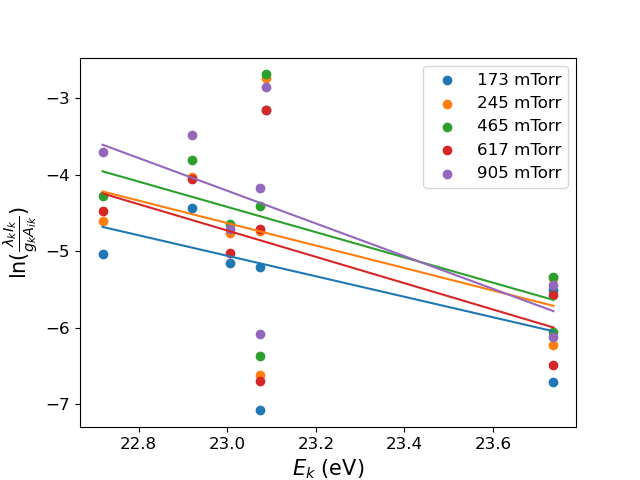

In [466]:
# p = '905'
wavelengths = np.array(list(He_line_info.keys()))
gs = np.array([2*He_line_info[w]['gk']+1 for w in wavelengths])
As = np.array([He_line_info[w]['Aki'] for w in wavelengths])
Es_He = np.array([He_line_info[w]['Ek'] for w in wavelengths])

pressures = ['173','245','465','617','905']
slopes = []
slopes_err = []
plt.figure()
for p in pressures:
    print(p)
    Is = np.array([np.mean(He_line_info[w]['Iik'][p]) for w in wavelengths]) # counts
    Is_err = np.array([np.std(He_line_info[w]['Iik'][p]) for w in wavelengths])

    # 1.38064852e-23 # m2 kg s-2 K-1

    LHS_He = np.log(wavelengths * Is / gs / As)
    
    plt.scatter(Es, LHS_He, label = p + ' mTorr')

    xrange = np.linspace(min(Es),max(Es),100)
    
    (m,b), cov = np.polyfit(Es, LHS_He, 1, cov=True)
    m_err, b_err = np.sqrt(np.diag(cov))
    plt.plot(xrange, m*xrange + b)
    slopes.append(m)
    slopes_err.append(m_err)
    print(-1/m, m_err)
    
slopes = np.array(slopes)
slopes_err = np.array(slopes_err)
plt.xlabel(r'$E_k$ (eV)')
plt.ylabel(r'$\ln(\frac{\lambda_k I_k}{g_k A_{ik}})$')
plt.legend()

Text(0, 0.5, '$T_e$ (eV)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
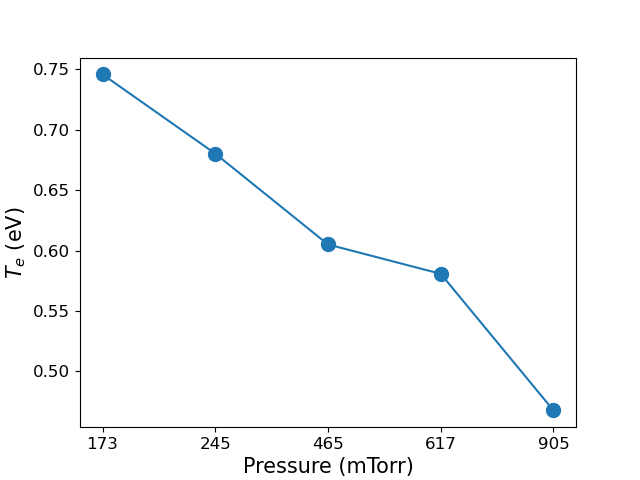

In [478]:
plt.figure()
plt.errorbar(pressures, -1/slopes,fmt='o-',markersize=10)
plt.xlabel('Pressure (mTorr)',fontsize=15)
plt.ylabel(r'$T_e$ (eV)',fontsize=15)

# Argon

In [403]:
files_Ar = glob.glob('Data/Spectra/Argon*.txt')


In [404]:
f = files_Ar[0]
spectra = pd.read_table(f,names=['channel','intensity'],skiprows=13,sep='\t')
channel = spectra.channel.values
intensity = spectra.intensity.values

In [409]:

# 394.9, 415.86, 420.07, 427.22, 545.17, 
# 573.95, 603.21, 675.28, 687.13, 696.54, 
# 703.03, 706.72, 720.70, 737.21, 738.40, 750.39, 
# 751.47, 763.51, 794.82, 800.62, 801.48, 810.37, 
# 811.53, 826.45

# Ar_line_info = {
# #     394.9:{'Aki': 4.6e+05 , 'Ei': 11.54835442,'Ek': 14.68711824 ,'gi':2 ,'gk':1 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}}, 
# #                    415.86:{'Aki': 1.40e+06, 'Ei':11.54835442 ,'Ek': 14.52891349,'gi':2 ,'gk':2 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
#                    420.07:{'Aki': 9.7e+05 , 'Ei':11.54835442 ,'Ek':14.49905364 ,'gi':2 ,'gk':3,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
#                    427.22:{'Aki': 8.0e+05 , 'Ei': 11.62359272 ,'Ek':14.52491330 ,'gi':1 ,'gk':1 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
# #                    545.17:{'Aki': 4.7e+05 , 'Ei': 12.90701530 ,'Ek': 12.90701530,'gi': 1,'gk':2 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
# #                    573.95:{'Aki': 8.7e+05 , 'Ei':13.15314387 ,'Ek': 15.31272913,'gi': 1,'gk': 2,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
#                    603.21:{'Aki': 2.46e+06 , 'Ei':13.07571571 ,'Ek':15.13054437 ,'gi':3 ,'gk':4 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
#                    675.28:{'Aki': 1.93e+06, 'Ei':12.90701530  ,'Ek': 14.74254085,'gi': 1,'gk':2 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
#                    687.13:{'Aki': 2.78e+06, 'Ei': 12.90701530,'Ek':14.71089810 ,'gi': 1,'gk': 1,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
#                    696.54:{'Aki': 6.4e+06, 'Ei':11.54835442 ,'Ek': 13.32785705 ,'gi': 2,'gk':1 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
#                    703.03:{'Aki': 2.67e+06 , 'Ei':13.07571571 ,'Ek': 14.83881100,'gi': 3,'gk': 2,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
#                    706.72:{'Aki': 3.8e+06, 'Ei':11.54835442 ,'Ek': 13.30222747 ,'gi':2 ,'gk':2 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
# #                    720.70:{'Aki': 2.48e+06 , 'Ei': 13.30222747,'Ek':15.02208834 ,'gi':2 ,'gk':1 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
# #                    737.21:{'Aki': 1.9e+06 , 'Ei': 13.07571571  ,'Ek': 14.7570516 ,'gi': 3,'gk': 4,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
#                    738.40:{'Aki': 8.5e+06, 'Ei':11.62359272 ,'Ek':13.30222747  ,'gi':1 ,'gk':2 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
# #                    750.39:{'Aki': 4.5e+07, 'Ei': 11.82807116 ,'Ek':13.47988682 ,'gi': 1,'gk':0 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
#                    751.47:{'Aki': 4.0e+07 , 'Ei':11.62359272 ,'Ek': 13.27303810,'gi': 1,'gk':0 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
#                    763.51:{'Aki': 2.45e+07 , 'Ei':11.54835442 ,'Ek':13.17177770,'gi': 2,'gk': 2,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
#                    794.82:{'Aki': 1.86e+07 , 'Ei':11.72316039 ,'Ek':13.28263902 ,'gi': 0,'gk':1 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
# #                    800.62:{'Aki': 4.9e+06 , 'Ei':11.62359272  ,'Ek':13.17177770 ,'gi':1 ,'gk':2 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
#                    801.48:{'Aki': 9.3e+06 , 'Ei':11.54835442 ,'Ek': 13.09487256,'gi':2 ,'gk':2 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
# #                    810.37:{'Aki': 2.50e+07 , 'Ei':11.62359272 ,'Ek': 13.15314387,'gi':1 ,'gk':1 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
#                    811.53:{'Aki': 3.3e+07 , 'Ei':11.54835442 ,'Ek':13.07571571  ,'gi':2 ,'gk':3 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
#                    826.45:{'Aki': 1.53e+07 , 'Ei': 11.82807116,'Ek': 13.32785705,'gi': 1,'gk': 1,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}}}


Ar_line_info = {
                420.07:{'Aki': 9.7e+05 , 'Ei':11.54835442 ,'Ek':14.49905364 ,'gi':2 ,'gk':3,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                427.22:{'Aki': 8.0e+05 , 'Ei': 11.62359272 ,'Ek':14.52491330 ,'gi':1 ,'gk':1 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                603.21:{'Aki': 2.46e+06 , 'Ei':13.07571571 ,'Ek':15.13054437 ,'gi':3 ,'gk':4 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                675.28:{'Aki': 1.93e+06, 'Ei':12.90701530  ,'Ek': 14.74254085,'gi': 1,'gk':2 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                687.13:{'Aki': 2.78e+06, 'Ei': 12.90701530,'Ek':14.71089810 ,'gi': 1,'gk': 1,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                696.54:{'Aki': 6.4e+06, 'Ei':11.54835442 ,'Ek': 13.32785705 ,'gi': 2,'gk':1 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                703.03:{'Aki': 2.67e+06 , 'Ei':13.07571571 ,'Ek': 14.83881100,'gi': 3,'gk': 2,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                706.72:{'Aki': 3.8e+06, 'Ei':11.54835442 ,'Ek': 13.30222747 ,'gi':2 ,'gk':2 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                738.40:{'Aki': 8.5e+06, 'Ei':11.62359272 ,'Ek':13.30222747  ,'gi':1 ,'gk':2 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
               751.47:{'Aki': 4.0e+07 , 'Ei':11.62359272 ,'Ek': 13.27303810,'gi': 1,'gk':0 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
               763.51:{'Aki': 2.45e+07 , 'Ei':11.54835442 ,'Ek':13.17177770,'gi': 2,'gk': 2,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
               794.82:{'Aki': 1.86e+07 , 'Ei':11.72316039 ,'Ek':13.28263902 ,'gi': 0,'gk':1 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
               801.48:{'Aki': 9.3e+06 , 'Ei':11.54835442 ,'Ek': 13.09487256,'gi':2 ,'gk':2 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
               811.53:{'Aki': 3.3e+07 , 'Ei':11.54835442 ,'Ek':13.07571571  ,'gi':2 ,'gk':3 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
               826.45:{'Aki': 1.53e+07 , 'Ei': 11.82807116,'Ek': 13.32785705,'gi': 1,'gk': 1,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}}}



In [410]:
Ar_line_info.keys()

dict_keys([420.07, 427.22, 603.21, 675.28, 687.13, 696.54, 703.03, 706.72, 738.4, 751.47, 763.51, 794.82, 801.48, 811.53, 826.45])

In [411]:
matplotlib.rcParams['font.size'] = 15

Text(0.5, 1.0, 'Argon Calibration Spectrum')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
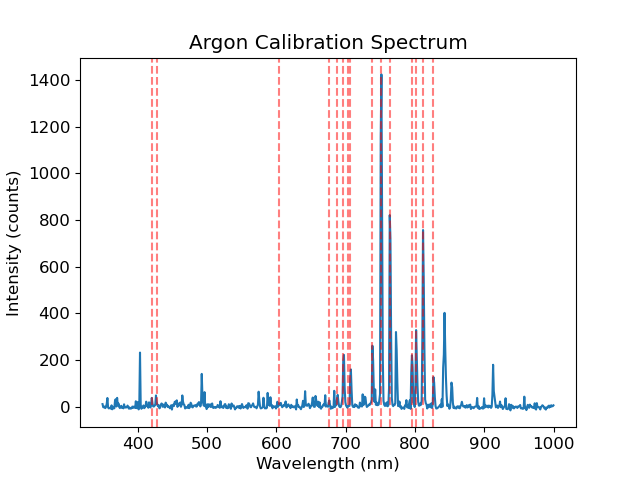

In [479]:
plt.figure()
plt.plot(channel*m_cal+b_cal, intensity,'-')

for l in Ar_line_info.keys():
    plt.axvline(l,c='r',linestyle='dashed',alpha=0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (counts)')
plt.title('Argon Calibration Spectrum')


# true_lines = [420.07, 427.22, 603.21, 675.28, 687.13, 696.54, 703.03, 706.72, 738.4, 751.47, 763.51, 794.82, 801.48, 811.53, 826.45]


In [357]:
matplotlib.rcParams['xtick.labelsize'] = 8
matplotlib.rcParams['ytick.labelsize'] = 8
matplotlib.rcParams['legend.fontsize'] = 8

AxesSubplot(0.125,0.798085;0.775x0.0819149)
AxesSubplot(0.125,0.699787;0.775x0.0819149)
AxesSubplot(0.125,0.601489;0.775x0.0819149)
AxesSubplot(0.125,0.503191;0.775x0.0819149)
AxesSubplot(0.125,0.404894;0.775x0.0819149)
AxesSubplot(0.125,0.306596;0.775x0.0819149)
AxesSubplot(0.125,0.208298;0.775x0.0819149)
AxesSubplot(0.125,0.11;0.775x0.0819149)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
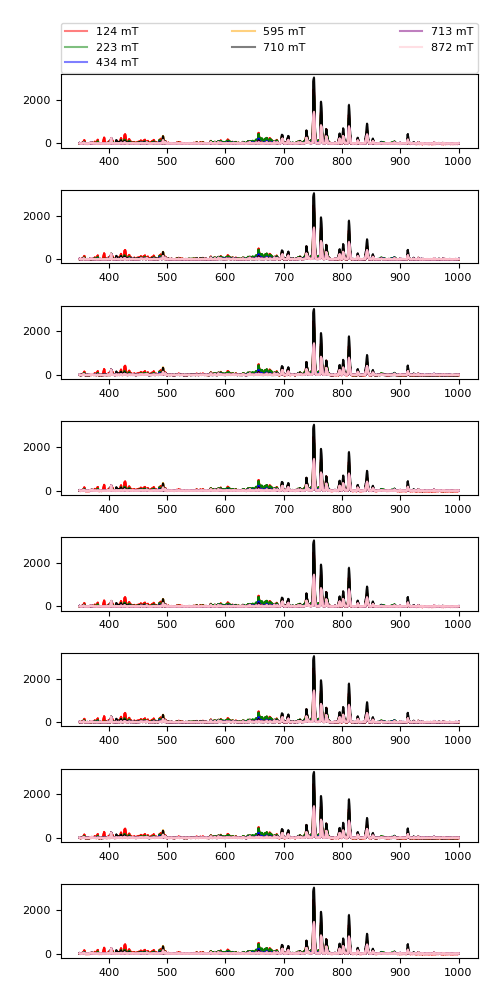

In [430]:
colors={'124':'r','223':'g','434':'b','595':'orange','710':'k','713':'purple','872':'pink'}

fig, axes = plt.subplots(8, figsize=(5,10))

for ax in axes.flatten():
    print(ax)
    plotted={'124':False,'223':False,'434':False,'595':False,'710':False,'713':False,'872':False}
    for f in files:
        if 'Cathode' not in f:
            spectra = pd.read_table(f,names=['channel','intensity'],skiprows=13,sep='\t')
            channel = spectra.channel.values
            intensity = spectra.intensity.values
            p = f.split('mT')[0].split('V')[1]
            if plotted[p]:
                ax.plot(channel, intensity,'-',c=colors[p],alpha=0.5)
            else:
                ax.plot(channel, intensity,'-',c=colors[p],alpha=0.5,label=p+' mT')
                plotted[p] = True
            for line in Ar_line_info.keys():
                I = np.sum(intensity[np.where((channel < (line + 2)) & (channel > (line - 2)))])
                Ar_line_info[line]['Iik'][p].append(I)

axes[0].legend(bbox_to_anchor=(0,1.02,1,0.2), mode="expand", borderaxespad=0,loc='lower left', ncol=3)
fig.tight_layout()


In [431]:
axes[7].set_xlabel('Wavelength (nm)')
axes[4].set_ylabel('Intensity (counts)')
fig.tight_layout()

In [432]:
Ar_df = pd.DataFrame.from_dict(Ar_line_info)

In [433]:
Ar_df

,420.07,427.22,603.21,675.28,687.13,696.54,703.03,706.72,738.40,751.47,763.51,794.82,801.48,811.53,826.45
Aki,970000.0,800000.0,2460000.0,1930000.0,2780000.0,6400000.0,2670000.0,3800000.0,8500000.0,40000000.0,24500000.0,18600000.0,9300000.0,33000000.0,15300000.0
Ei,11.548354,11.623593,13.075716,12.907015,12.907015,11.548354,13.075716,11.548354,11.623593,11.623593,11.548354,11.72316,11.548354,11.548354,11.828071
Ek,14.499054,14.524913,15.130544,14.742541,14.710898,13.327857,14.838811,13.302227,13.302227,13.273038,13.171778,13.282639,13.094873,13.075716,13.327857
gi,2,1,3,1,1,2,3,2,1,1,2,0,2,2,1
gk,3,1,4,2,1,1,2,2,2,0,2,1,2,3,1
Iik,"{'124': [449.10999999999996, 422.3800000000000...","{'124': [1157.62, 1164.69, 1164.37, 1171.03, 1...","{'124': [470.77, 451.90999999999997, 469.56000...","{'124': [584.23, 571.09, 609.46, 560.59, 590.7...","{'124': [389.12, 379.82, 385.35999999999996, 3...","{'124': [665.2, 634.88, 646.56, 639.23, 654.1,...","{'124': [11.109999999999996, 17.72, 45.49, 27....","{'124': [502.82, 475.24, 500.36, 494.51, 484.2...","{'124': [1186.25, 1187.0, 1209.71, 1195.28, 12...","{'124': [6126.360000000001, 6033.75, 6038.72, ...","{'124': [2660.01, 2680.51, 2646.14, 2656.41, 2...","{'124': [523.21, 505.08, 548.49, 507.81, 523.9...","{'124': [811.7700000000001, 825.15, 819.459999...","{'124': [2579.98, 2574.81, 2576.05, 2578.27, 2...","{'124': [232.60000000000002, 220.09, 254.31, 2..."


[  74.76833333  118.48166667  101.09555556  144.99333333  136.56833333
  368.13166667   18.16888889  255.16111111  503.20166667 2749.28833333
 1369.12666667  325.72055556  499.35       1349.74722222  180.76222222]
-0.363492145597968 0.11041305518133324
2.7510910816379144 1.03369570516276
[  62.90055556   92.19222222   63.78388889   89.53888889  106.65666667
  377.39555556   16.56277778  251.47444444  451.54277778 2721.49888889
 1343.21        329.31722222  519.90333333 1369.04666667  197.21055556]
-0.5575795669636079 2.684597141290189
1.7934660078124205 1.03369570516276
[ 188.10933333  203.002        78.45666667   83.08666667  116.478
  685.268        44.19533333  520.69133333  904.86933333 5914.47933333
 2919.24133333  659.02       1069.37       2935.526       359.52      ]
-0.7145291764343161 5.485947331331656
1.3995229767806774 1.03369570516276
[  51.55388889   83.155        51.34333333   57.63722222   84.04944444
  373.91666667   10.39611111  251.67944444  429.2        2720.5205555

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
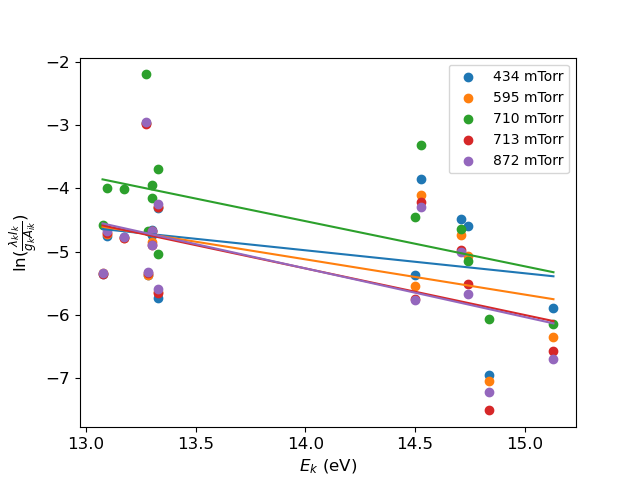

In [484]:
wavelengths = np.array(list(Ar_line_info.keys()))
gs = np.array([2*Ar_line_info[w]['gk']+1 for w in wavelengths])
As = np.array([Ar_line_info[w]['Aki'] for w in wavelengths])
Es_Ar = np.array([Ar_line_info[w]['Ek'] for w in wavelengths])

plt.figure()
slopes = []
slopes_err = []
pressures = ['434','595','710','713','872']
for p in pressures:
    Is = np.array([np.mean(Ar_line_info[w]['Iik'][p]) for w in wavelengths]) # counts
    Is_err = np.array([np.std(Ar_line_info[w]['Iik'][p]) for w in wavelengths])
    print(Is)

    LHS_Ar = np.log(wavelengths * Is / gs / As)
    plt.scatter(Es_Ar, LHS_Ar, label = p + ' mTorr')
    m,b = np.polyfit(Es_Ar,LHS_Ar, 1)

#     plt.scatter(Es_He, LHS_He)

    xrange = np.linspace(min(Es_Ar),max(Es_Ar),100)

#     m,b = np.polyfit(np.append(Es_Ar,Es_He), np.append(LHS_Ar, LHS_He), 1)
    plt.plot(xrange, m*xrange + b)
    print(m,b)
    slopes.append(m)
    slopes_err.append(m_err)
    print(-1/m, m_err)
    
slopes = np.array(slopes)
slopes_err = np.array(slopes_err)
plt.xlabel(r'$E_k$ (eV)')
plt.ylabel(r'$\ln(\frac{\lambda_k I_k}{g_k A_{ik}})$')
plt.legend(fontsize=10)

Text(0, 0.5, '$T_e$ (eV)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
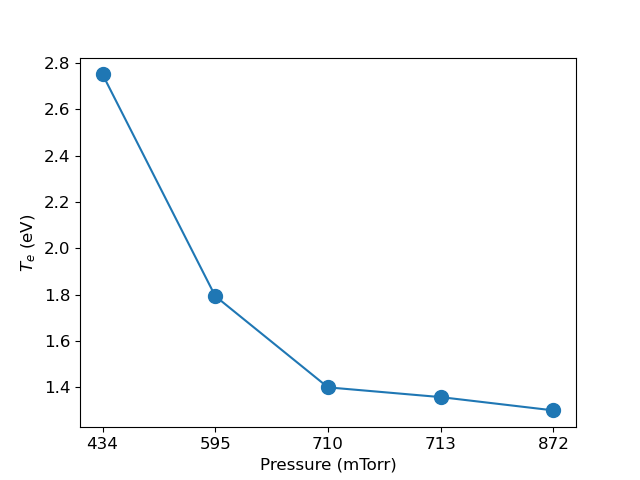

In [483]:
plt.figure()
plt.errorbar(pressures, -1/slopes,fmt='o-', markersize=10)
plt.xlabel('Pressure (mTorr)')
plt.ylabel(r'$T_e$ (eV)')

In [437]:
anode_files = glob.glob('Data/Spectra/Argon*Anode*.txt')
cathode_files = glob.glob('Data/Spectra/Argon*Cathode*.txt')

# Cathode vs Anode

In [485]:
Ar_cathode_info = {
                420.07:{'Aki': 9.7e+05 , 'Ei':11.54835442 ,'Ek':14.49905364 ,'gi':2 ,'gk':3,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                427.22:{'Aki': 8.0e+05 , 'Ei': 11.62359272 ,'Ek':14.52491330 ,'gi':1 ,'gk':1 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                603.21:{'Aki': 2.46e+06 , 'Ei':13.07571571 ,'Ek':15.13054437 ,'gi':3 ,'gk':4 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                675.28:{'Aki': 1.93e+06, 'Ei':12.90701530  ,'Ek': 14.74254085,'gi': 1,'gk':2 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                687.13:{'Aki': 2.78e+06, 'Ei': 12.90701530,'Ek':14.71089810 ,'gi': 1,'gk': 1,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                696.54:{'Aki': 6.4e+06, 'Ei':11.54835442 ,'Ek': 13.32785705 ,'gi': 2,'gk':1 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                703.03:{'Aki': 2.67e+06 , 'Ei':13.07571571 ,'Ek': 14.83881100,'gi': 3,'gk': 2,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                706.72:{'Aki': 3.8e+06, 'Ei':11.54835442 ,'Ek': 13.30222747 ,'gi':2 ,'gk':2 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                738.40:{'Aki': 8.5e+06, 'Ei':11.62359272 ,'Ek':13.30222747  ,'gi':1 ,'gk':2 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
               751.47:{'Aki': 4.0e+07 , 'Ei':11.62359272 ,'Ek': 13.27303810,'gi': 1,'gk':0 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
               763.51:{'Aki': 2.45e+07 , 'Ei':11.54835442 ,'Ek':13.17177770,'gi': 2,'gk': 2,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
               794.82:{'Aki': 1.86e+07 , 'Ei':11.72316039 ,'Ek':13.28263902 ,'gi': 0,'gk':1 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
               801.48:{'Aki': 9.3e+06 , 'Ei':11.54835442 ,'Ek': 13.09487256,'gi':2 ,'gk':2 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
               811.53:{'Aki': 3.3e+07 , 'Ei':11.54835442 ,'Ek':13.07571571  ,'gi':2 ,'gk':3 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
               826.45:{'Aki': 1.53e+07 , 'Ei': 11.82807116,'Ek': 13.32785705,'gi': 1,'gk': 1,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}}}

Ar_anode_info = {
                420.07:{'Aki': 9.7e+05 , 'Ei':11.54835442 ,'Ek':14.49905364 ,'gi':2 ,'gk':3,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                427.22:{'Aki': 8.0e+05 , 'Ei': 11.62359272 ,'Ek':14.52491330 ,'gi':1 ,'gk':1 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                603.21:{'Aki': 2.46e+06 , 'Ei':13.07571571 ,'Ek':15.13054437 ,'gi':3 ,'gk':4 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                675.28:{'Aki': 1.93e+06, 'Ei':12.90701530  ,'Ek': 14.74254085,'gi': 1,'gk':2 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                687.13:{'Aki': 2.78e+06, 'Ei': 12.90701530,'Ek':14.71089810 ,'gi': 1,'gk': 1,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                696.54:{'Aki': 6.4e+06, 'Ei':11.54835442 ,'Ek': 13.32785705 ,'gi': 2,'gk':1 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                703.03:{'Aki': 2.67e+06 , 'Ei':13.07571571 ,'Ek': 14.83881100,'gi': 3,'gk': 2,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                706.72:{'Aki': 3.8e+06, 'Ei':11.54835442 ,'Ek': 13.30222747 ,'gi':2 ,'gk':2 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
                738.40:{'Aki': 8.5e+06, 'Ei':11.62359272 ,'Ek':13.30222747  ,'gi':1 ,'gk':2 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
               751.47:{'Aki': 4.0e+07 , 'Ei':11.62359272 ,'Ek': 13.27303810,'gi': 1,'gk':0 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
               763.51:{'Aki': 2.45e+07 , 'Ei':11.54835442 ,'Ek':13.17177770,'gi': 2,'gk': 2,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
               794.82:{'Aki': 1.86e+07 , 'Ei':11.72316039 ,'Ek':13.28263902 ,'gi': 0,'gk':1 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
               801.48:{'Aki': 9.3e+06 , 'Ei':11.54835442 ,'Ek': 13.09487256,'gi':2 ,'gk':2 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
               811.53:{'Aki': 3.3e+07 , 'Ei':11.54835442 ,'Ek':13.07571571  ,'gi':2 ,'gk':3 ,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}},
               826.45:{'Aki': 1.53e+07 , 'Ei': 11.82807116,'Ek': 13.32785705,'gi': 1,'gk': 1,'Iik':{'124':[],'223':[],'434':[],'595':[],'710':[],'713':[],'872':[]}}}


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
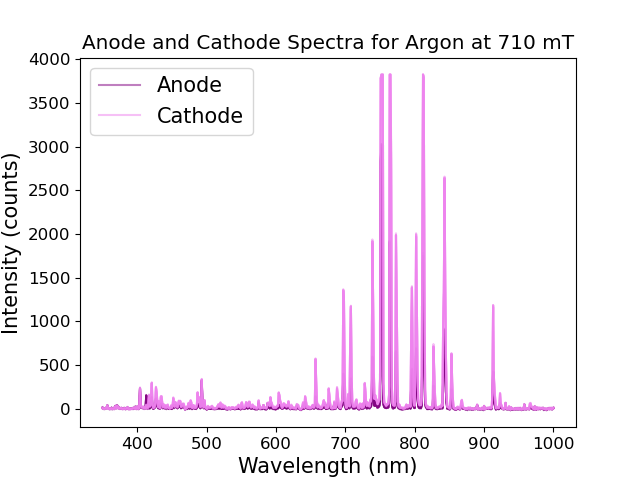

In [490]:

matplotlib.rcParams['legend.fontsize'] = 15
plt.figure()

plotted = False
for f in anode_files:
    spectra = pd.read_table(f,names=['channel','intensity'],skiprows=13,sep='\t')
    channel = spectra.channel.values
    intensity = spectra.intensity.values
    p = f.split('mT')[0].split('V')[1]
    if not plotted:
        plt.plot(channel, intensity,'-',c='purple',alpha=0.5,label='Anode')
        plotted = True
    else:
        plt.plot(channel, intensity,'-',c='purple',alpha=0.5)
    for line in Ar_anode_info.keys():
                I = np.sum(intensity[np.where((channel < (line + 2)) & (channel > (line - 2)))])
                Ar_anode_info[line]['Iik'][p].append(I)
    
plotted= False
for f in cathode_files:
    spectra = pd.read_table(f,names=['channel','intensity'],skiprows=13,sep='\t')
    channel = spectra.channel.values
    intensity = spectra.intensity.values
    p = f.split('mT')[0].split('V')[1]
    if not plotted:
        plt.plot(channel, intensity,'-',c='violet',alpha=0.5,label='Cathode')
        plotted = True
    else:
        plt.plot(channel, intensity,'-',c='violet',alpha=0.5)
    for line in Ar_cathode_info.keys():
                I = np.sum(intensity[np.where((channel < (line + 2)) & (channel > (line - 2)))])
                Ar_cathode_info[line]['Iik'][p].append(I)

plt.xlabel('Wavelength (nm)', fontsize=15)
plt.ylabel('Intensity (counts)', fontsize=15)
plt.title('Anode and Cathode Spectra for Argon at 710 mT')
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
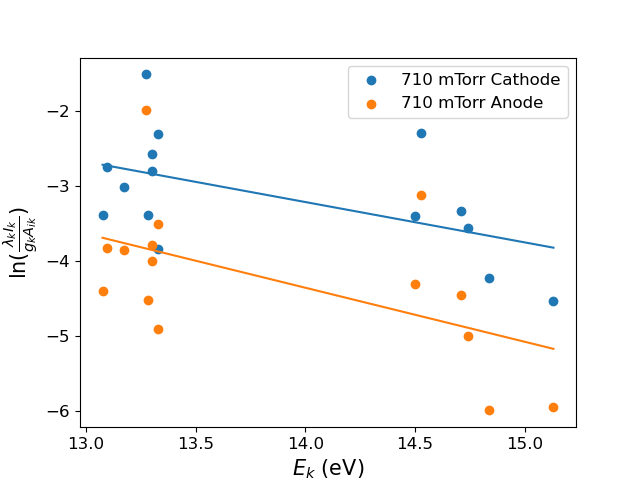

In [489]:
wavelengths = np.array(list(Ar_line_info.keys()))
gs = np.array([2*Ar_line_info[w]['gk']+1 for w in wavelengths])
As = np.array([Ar_line_info[w]['Aki'] for w in wavelengths])
Es_Ar = np.array([Ar_line_info[w]['Ek'] for w in wavelengths])

plt.figure()


Is_cathode = np.array([np.mean(Ar_cathode_info[w]['Iik'][p]) for w in wavelengths]) # counts
Is_err_cathode = np.array([np.std(Ar_cathode_info[w]['Iik'][p]) for w in wavelengths])
LHS_cathode = np.log(wavelengths * Is_cathode / gs / As)
plt.scatter(Es_Ar, LHS_cathode, label = p + ' mTorr Cathode')
m,b = np.polyfit(Es_Ar,LHS_cathode, 1)
xrange = np.linspace(min(Es_Ar),max(Es_Ar),100)
plt.plot(xrange, m*xrange + b)


Is_anode = np.array([np.mean(Ar_anode_info[w]['Iik'][p]) for w in wavelengths]) # counts
Is_err_anode = np.array([np.std(Ar_anode_info[w]['Iik'][p]) for w in wavelengths])
LHS_anode = np.log(wavelengths * Is_anode / gs / As)
plt.scatter(Es_Ar, LHS_anode, label = p + ' mTorr Anode')
m,b = np.polyfit(Es_Ar,LHS_anode, 1)
xrange = np.linspace(min(Es_Ar),max(Es_Ar),100)
plt.plot(xrange, m*xrange + b)

plt.xlabel(r'$E_k$ (eV)', fontsize=15)
plt.ylabel(r'$\ln(\frac{\lambda_k I_k}{g_k A_{ik}})$', fontsize=15)
plt.legend(fontsize=12)